### Project: Analyzing NYC High School Data

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2). The first few rows of the SAT data look like this:

<img src="https://s3.amazonaws.com/dq-content/sat.png">

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:[datasets](https://data.cityofnewyork.us/browse?category=Education)

- SAT scores by school - SAT scores for each high school in New York City
- School attendance - Attendance information for each school in New York City
- Class size - Information on class size for each school
- AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- Graduation outcomes - The percentage of students who graduated, and other outcome information
- Demographics - Demographic information for each school
- School survey - Surveys of parents, teachers, and students at each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

Before we move into coding, we'll need to do some background research. A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research will also give us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

- [New York City](https://en.wikipedia.org/wiki/New_York_City)
- [The SAT](https://en.wikipedia.org/wiki/SAT)
- [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
- [Our data](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

- Only high school students take the SAT, so we'll want to focus on high schools.
New York City is made up of five boroughs, which are essentially distinct regions.
- New York City schools fall within several different school districts, each of which can contains dozens of schools.
- Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
- Each school in New York City has a unique code called a <font color=red>__DBN__</font>, or district borough number.
- Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

Once we've done our background research, we're ready to read in the data. For your convenience, we've placed all the data into the schools folder. Here are all of the files in the folder:

- ap_2010.csv - Data on AP test results
- class_size.csv - Data on class size
- demographics.csv - Data on demographics
- graduation.csv - Data on graduation outcomes
- hs_directory.csv - A directory of high schools
- sat_results.csv - Data on SAT scores
- survey_all.txt - Data on surveys from all schools
- survey_d75.txt - Data on surveys from New York City district 75

__survey_all.txt__ and __survey_d75.txt__ are in more complicated formats than the other files. For now, we'll focus on reading in the CSV files only, and then explore them.


# Read in the data

We'll read each file into a pandas dataframe, and then store all of the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on.

In [18]:
import pandas as pd
import numpy
import re

# store all of the dataframes in a dictionary
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

# Read each of the files in the list data_files into a pandas dataframe using the pandas.read_csv() function.
# Recall that all of the data sets are in the schools folder. That means the path to ap_2010.csv is schools/ap_2010.csv.

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d
    
# Display the first five rows of the SAT scores data
print(data["sat_results"].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

We can make a few observations based on this output:

- The DBN appears to be a unique ID for each school.
- We can tell from the first few rows of names that we only have data about high schools.
- There's only a single row for each high school, so each DBN is unique in the SAT data.
- We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg. Score, SAT Math Avg. Score, and SAT Writing Avg. Score -- into a single column to make the scores easier to analyze.

Given these observations, let's explore the other data sets to see if we can gain any insight into how to combine them.

In [19]:
# Loop through each key in data. For each key:
# Display the first five rows of the dataframe associated with the key.
for k in data:
    print(data[k].head())

      dbn                                        school_name       boro  \
0  17K548                Brooklyn School for Music & Theatre   Brooklyn   
1  09X543                   High School for Violin and Dance      Bronx   
2  09X327        Comprehensive Model School Project M.S. 327      Bronx   
3  02M280     Manhattan Early College School for Advertising  Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary Sc...     Queens   

  building_code    phone_number    fax_number grade_span_min  grade_span_max  \
0          K440    718-230-6250  718-230-6262              9              12   
1          X400    718-842-0687  718-589-9849              9              12   
2          X240    718-294-8111  718-294-8109              6              12   
3          M520  718-935-3477             NaN              9              10   
4          Q695    718-969-3155  718-969-3552              6              12   

  expgrade_span_min  expgrade_span_max  \
0               NaN       

We can make some observations based on the first few rows of each one.

- Each data set appears to either have a DBN column, or the information we need to create one. That means we can use a DBN column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical DBNs, then group all of their columns together in a single data set.
- Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.
- Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

# Read in the surveys

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier (survey_all.txt and survey_d75.txt), but we didn't read those files in because they're in a slightly more complex format.


In [20]:
# Read in survey_all.txt.
# Use the pandas.read_csv() function to read survey_all.txt into the variable all_survey. Recall that this file is located in the schools folder.
# Specify the keyword argument delimiter="\t".
# Specify the keyword argument encoding="windows-1252".
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')

# Read in survey_d75.txt.
# Use the pandas.read_csv() function to read schools/survey_d75.txt into the variable d75_survey. Recall that this file is located in the schools folder.
# Specify the keyword argument delimiter="\t".
# Specify the keyword argument encoding="windows-1252".
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')

# Combine d75_survey and all_survey into a single dataframe.
# Use the pandas concat() function with the keyword argument axis=0 to combine d75_survey and all_survey into the dataframe survey.
# Pass in all_survey first, then d75_survey when calling the pandas.concat() function.
survey = pd.concat([all_survey, d75_survey], axis=0)

# Display the first five rows
print(survey.head())

     N_p    N_s   N_t  aca_p_11  aca_s_11  aca_t_11  aca_tot_11    bn  \
0   90.0    NaN  22.0       7.8       NaN       7.9         7.9  M015   
1  161.0    NaN  34.0       7.8       NaN       9.1         8.4  M019   
2  367.0    NaN  42.0       8.6       NaN       7.5         8.0  M020   
3  151.0  145.0  29.0       8.5       7.4       7.8         7.9  M034   
4   90.0    NaN  23.0       7.9       NaN       8.1         8.0  M063   

   com_p_11  com_s_11   ...    t_q8c_1  t_q8c_2  t_q8c_3 t_q8c_4  t_q9  \
0       7.6       NaN   ...       29.0     67.0      5.0     0.0   NaN   
1       7.6       NaN   ...       74.0     21.0      6.0     0.0   NaN   
2       8.3       NaN   ...       33.0     35.0     20.0    13.0   NaN   
3       8.2       5.9   ...       21.0     45.0     28.0     7.0   NaN   
4       7.9       NaN   ...       59.0     36.0      5.0     0.0   NaN   

   t_q9_1  t_q9_2  t_q9_3  t_q9_4  t_q9_5  
0     5.0    14.0    52.0    24.0     5.0  
1     3.0     6.0     3.0   

There are two immediate facts that we can see in the data:

- There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
- The survey data has a dbn column that we'll want to convert to uppercase (DBN). The conversion will make the column name consistent with the other data sets.

First, we'll need to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the [original data download location](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

Here's a preview of the data dictionary:
<img src="https://s3.amazonaws.com/dq-content/xj5ud4r.png">

Based on the dictionary, it looks like these are the relevant columns:

["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

These columns will give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It will also give us the DBN, which allows us to uniquely identify the school.

Before we filter columns out, we'll want to copy the data from the dbn column into a new column called DBN. We can copy columns like this:

In [21]:
# Copy the data from the dbn column of survey into a new column in survey called DBN.
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

# Filter survey so it only contains the columns we listed above. 
# You can do this using pandas.DataFrame.loc[].
survey = survey.loc[:,survey_fields]
# Assign the dataframe survey to the key survey in the dictionary data.
data["survey"] = survey
# the value in data["survey"] should be a dataframe with 23 columns and 1702 rows.
print(survey.head())

      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

      ...      eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0     ...           7.6       7.9       NaN       NaN       NaN       NaN   
1     ...           8.9       9.1       NaN       NaN       NaN       NaN   
2     ...           6.8       7.5       NaN       NaN       NaN       NaN   
3     ...           6.8       7.8       6.2       5.9       6.5       7.4   
4     ...           7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11 

When we explored all of the data sets, we noticed that some of them, like __class_size__and __hs_directory__, don't have a __DBN__ column. __hs_directory__ does have a dbn column, though, so we can just rename it.

__sat_results__ data, which does have a __DBN__ column:

From looking at these rows, we can tell that the __DBN__ in the __sat_results__ data is just a combination of the __CSD__ and __SCHOOL CODE__ columns in the __class_size__ data. The main difference is that the __DBN__ is padded, so that the __CSD__ portion of it always consists of two digits. That means we'll need to add a leading 0 to the __CSD__ if the __CSD__ is less than two digits long.

| CSD |Padded CSD   |
|------|------|
|   1  |01      |
| 19 | 19  |
| 2 | 02  |
| 99 | 99   |


# Add DBN columns
As you can see, whenever the CSD is less than two digits long, we need to add a leading 0. We can accomplish this using the pandas.Series.apply() method, along with a custom function that:
- Takes in a number.
- Converts the number to a string using the str() function.
- Check the length of the string using the len() function.
    - If the string is two digits long, returns the string.
    - If the string is one digit long, adds a 0 to the front of the string, then returns it.
        - You can use the string method zfill() to do this.
        
Once we've padded the CSD, we can use the addition operator (+) to combine the values in the CSD and SCHOOL CODE columns. Here's an example of how we would do this:

In [22]:
# Copy the dbn column in hs_directory into a new column called DBN.
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

# Create a new column called padded_csd in the class_size data set.
# Use the pandas.Series.apply() method along with a custom function to generate this column.
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation

#  apply the function along the data["class_size"]["CSD"] column.   
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)

# Use the addition operator (+) along with the padded_csd and SCHOOL CODE columns of class_size, 
# then assign the result to the DBN column of class_size.
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

# Display the first few rows of class_size to double check the DBN column.
print(data["class_size"].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


# Convert columns to numeric

Now we're almost ready to combine our data sets. Before we do, let's take some time to calculate variables that will be useful in our analysis. We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam. This will make it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the __SAT Math Avg. Score__, __SAT Critical Reading Avg. Score__, and __SAT Writing Avg. Score__ columns in the __sat_results__ data set from the object (string) data type to a numeric data type. We can use the pandas.to_numeric() method for the conversion. If we don't convert the values, we won't be able to add the columns together.

It's important to pass the keyword argument __errors="coerce"__ when we call __pandas.to_numeric()__, so that pandas treats any invalid strings it can't convert to numbers as missing values instead.

After we perform the conversion, we can use the addition operator (+) to add all three columns together.

In [23]:
# Convert the columns in the sat_results data set from the object (string) data type to a numeric data type.
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

# Use the pandas.to_numeric() function on each of the columns, and assign the result back to the same column.
# Pass in the keyword argument errors="coerce".
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

# Create a column called sat_score in sat_results that holds the combined SAT score for each student.
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]


# Display the first few rows of the sat_score column of sat_results to verify that everything went okay.
print(data['sat_results']['sat_score'].head())

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


Next, we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field Location 1 in the hs_directory data set.

Let's take a look at the first few rows:

    0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
    1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
    2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
    3    411 Pearl Street\nNew York, NY 10038\n(40.7106...
    4    160-20 Goethals Avenue\nJamaica, NY 11432\n(40...
    
As you can see, this field contains a lot of information we don't need. We want to extract the coordinates, which are in parentheses at the end of the field. Here's an example:

    1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)
We want to extract the latitude, __40.8276026690005__, and the longitude, __-73.90447525699966__. Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.

We can do the extraction with a regular expression. The following expression will pull out everything inside the parentheses:

    import re (Which we imported already did at the start of code)
    re.findall("\(.+\)", "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)")

This command will return __[(40.8276026690005, -73.90447525699966)]__. We'll need to process this result further using the string methods split() and replace() methods to extract each coordinate.

In [24]:
# This function that: Takes in a string, Uses the regular expression above to extract the coordinates
# Uses string manipulation functions to pull out the latitude & Returns the latitude
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

# This function that: Takes in a string, Uses the regular expression above to extract the coordinates
# Uses string manipulation functions to pull out the latitude & Returns the longitude
def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

# Use the Series.apply() method to apply the function across the Location 1 column of hs_directory. 
# Assign the result to the lat & lon columns of hs_directory accordingly.
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
# Display the first few rows of hs_directory to verify the results.
print(data["hs_directory"].head())

data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

# Use the to_numeric() function to convert the lat and lon columns of hs_directory to numbers.
# Specify the errors="coerce" keyword argument to handle missing values properly.
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

# Display the first few rows of hs_directory to verify the results.
print(data["hs_directory"].head())

      dbn                                        school_name       boro  \
0  17K548                Brooklyn School for Music & Theatre   Brooklyn   
1  09X543                   High School for Violin and Dance      Bronx   
2  09X327        Comprehensive Model School Project M.S. 327      Bronx   
3  02M280     Manhattan Early College School for Advertising  Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary Sc...     Queens   

  building_code    phone_number    fax_number grade_span_min  grade_span_max  \
0          K440    718-230-6250  718-230-6262              9              12   
1          X400    718-842-0687  718-589-9849              9              12   
2          X240    718-294-8111  718-294-8109              6              12   
3          M520  718-935-3477             NaN              9              10   
4          Q695    718-969-3155  718-969-3552              6              12   

  expgrade_span_min  expgrade_span_max         ...          \
0     

# Condense datasets
we'll clean the data a bit more, then combine it. Finally, we'll compute correlations and perform some analysis.

The first thing we'll need to do in preparation for the merge is condense some of the data sets. We noticed that the values in the DBN column were unique in the sat_results data set. Other data sets like class_size had duplicate DBN values, however.

We'll need to condense these data sets so that each value in the DBN column is unique. If not, we'll run into issues when it comes time to combine the data sets.

While the main data set we want to analyze, sat_results, has unique DBN values for every high school in New York City, other data sets aren't as clean. A single row in the sat_results data set may match multiple rows in the class_size data set, for example. This situation will create problems, because we don't know which of the multiple entries in the class_size data set we should combine with the single matching entry in sat_results.

To resolve this issue, we'll condense the class_size, graduation, and demographics data sets so that each DBN is unique.

In [25]:
# Create a new variable called class_size, 
# and assign the value of data["class_size"] to it.
class_size = data["class_size"]
#Filter class_size so the GRADE  column only contains the value 09-12.
# Note that the name of the GRADE  column has a space at the end; you'll generate an error if you don't include it.
class_size = class_size[class_size["GRADE "] == "09-12"]
# Filter class_size so that the PROGRAM TYPE column only contains the value GEN ED.
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
print(class_size.head())

     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -  

As we saw when we displayed __class_size__ on the last screen, __DBN__ still isn't completely unique. This is due to the __CORE COURSE (MS CORE and 9-12 ONLY)__ and __CORE SUBJECT (MS CORE and 9-12 ONLY)__ columns and both seem to pertain to different kinds of classes. For example, here are the unique values for CORE SUBJECT (MS CORE and 9-12 ONLY):

    array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)
    
This column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This will give us unique __DBN__ values, while also incorporating as much data as possible into the average.

Fortunately, we can use the __pandas.DataFrame.groupby()__ method to help us with this. The __DataFrame.groupby()__ method will split a dataframe up into unique groups, based on a given column. We can then use the __agg()__ method on the resulting pandas.core.groupby object to find the mean of each column.

After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case __DBN__) will become the index, and will no longer appear as a column in the data itself. To undo this change and keep DBN as a column, we'll need to use __pandas.DataFrame.reset_index()__. This method will reset the index to a list of integers and make __DBN__ a column again.

In [26]:
# To find the average values for each column associated with each DBN in class_size.
# Use the agg() method on the resulting pandas.core.groupby object, 
# along with the numpy.mean() function as an argument, to calculate the average of each group.
class_size = class_size.groupby("DBN").agg(numpy.mean)
# Reset the index to make DBN a column again by using the pandas.DataFrame.reset_index() method, 
# along with the keyword argument inplace=True.
class_size.reset_index(inplace=True)
# Assign class_size back to the class_size key of the data dictionary.
data["class_size"] = class_size
# Display the first few rows of data["class_size"] to verify that everything went okay.
print(data["class_size"].head())

### Now that we've finished condensing class_size, let's condense demographics.
# the only column that prevents a given DBN from being unique is schoolyear. 
# We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

# Finally, we'll need to condense the graduation data set.
# The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data.
# A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. 
# In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, 
# so we'll only pick rows where Demographic is Total Cohort
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
# Display the first few rows of data["graduation"] to verify that everything worked properly.
print (data['graduation'].head())

      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000            2.000000   
2  01M378    1                            33.0000            1.000000   
3  01M448    1                           105.6875            4.750000   
4  01M450    1                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                   

# Convert AP scores to numeric

The only remaining thing to do is convert the Advanced Placement (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the __ap_2010__ data set to numeric values first.

There are three columns we'll need to convert:

- AP Test Takers (note that there's a trailing space in the column name)
- Total Exams Taken
- Number of Exams with scores 3 4 or 5

In [27]:
# Convert each of the following columns in ap_2010 to numeric values using the pandas.to_numeric() function with the keyword argument errors="coerce".
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

# Display the column types using the dtypes attribute.
type(data['ap_2010'].dtypes)

pandas.core.series.Series

# Combine the datasets

We'll need to decide on the merge strategy we want to use. We'll be using the pandas __pandas.DataFrame.merge__ function, which supports four types of joins -- *left*, *right*, *inner*, and *outer* .

There may be __DBN__ values that exist in one data set but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the DBN values in __sat_results__ in all of the other data sets, and other data sets may have __DBN__ values that don't exist in sat_results.

We'll merge two data sets at a time. For example, we'll merge sat_results and hs_directory, then merge the result with ap_2010, then merge the result of that with class_size. We'll continue combining data sets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row will have columns from all of the data sets.

Because this project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from sat_results while minimizing null values.


In [28]:
combined = data["sat_results"]

# Use the pandas pandas.DataFrame.merge() method to merge the ap_2010 data set into combined.
# specify how="left" as a keyword argument to indicate the correct join type.
# Assign the result of the merge operation back to combined.
combined = combined.merge(data["ap_2010"], on="DBN", how="left")

# Use the pandas df.merge() method to merge the graduation data set into combined.
# specify how="left" as a keyword argument to get the correct join type.
# Assign the result of the merge operation back to combined.
combined = combined.merge(data["graduation"], on="DBN", how="left")

# Display the first few rows of combined to verify that the correct operations occurred.
# dipslay shape by using pandas.DataFrame.shape of the dataframe and see how many rows now exist.
print(combined.head(5))
print(combined.shape)

# Merge class_size into combined. Then, merge demographics, survey, and hs_directory into combined one by one, in that order.
# Be sure to follow the exact order above.
# Specify the correct column to join on, as well as the correct join type.
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

# Display the first few rows of combined to verify that the correct operations occurred.
# dipslay shape by using pandas.DataFrame.shape of the dataframe and see how many rows now exist.
print(combined.head(5))
print(combined.shape)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0      

We have noticed that the inner joins resulted in 116 fewer rows in sat_results.we're currently looking for high-level correlations, so we don't need to dive into which DBNs are missing.

We also have noticed that we now have many columns with null (NaN) values. This is because we chose to do left joins, where some columns may not have had data. The data set also had some missing values to begin with. If we hadn't performed a left join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set. We'll just fill in the missing values with the overall mean for the column

In [29]:
# Calculating the means of all of the columns in combined using the pandas.DataFrame.mean() method.
# Filling in any missing values in combined with the means of the respective columns using the pandas.DataFrame.fillna() method.
combined = combined.fillna(combined.mean())

# Filling in any remaining missing values in combined with 0 using the df.fillna() method.
combined = combined.fillna(0)

# Display the first few rows of combined to verify that the correct operations occurred.
print(combined.head(5))

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

# Add a school district column for mapping

We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.

In [30]:
# a function that extracts the first two characters of a string and returns them.
def get_first_two_chars(dbn):
    return dbn[0:2]
# Applying the function to the DBN column of combined, and assigning the result to the school_dist column of combined.
combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

# Displaying the first few items in the school_dist column of combined to verify the results.
print(combined["school_dist"].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


# Find correlations

Now, we'll discover correlations, create plots, and then make maps. The first thing we'll do is find any correlations between any of the columns and sat_score. This will help us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and make maps using the columns we've identified.

Correlations tell us how closely related two columns are. We'll be using the [r value](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), also called [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which measures how closely two sequences of numbers are correlated.

An r value falls between -1 and 1. The value tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the stronger the positive correlation between the two columns. The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to 0, the weaker the correlation. To learn more about r values, see the statistics course.

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.

We can use the pandas pandas.DataFrame.corr() method to find correlations between columns in a dataframe. The method returns a new dataframe where the index for each column and row is the name of a column in the original data set.

In [31]:
# Use the pandas.DataFrame.corr() method on the combined dataframe to find all possible correlations.
# Assign the result to correlations.
correlations = combined.corr()

# Filter correlations so that it only shows correlations for the column sat_score.
correlations = correlations["sat_score"]

# Displaying all of the rows in correlations
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

# Plotting survey correlations

Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.

We can also make some other observations:

- total_enrollment has a strong positive correlation with sat_score. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
    - Other columns that are proxies for enrollment correlate similarly. These include total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS.
- Both the percentage of females (female_per) and number of females (female_num) at a school correlate positively with SAT score, whereas the percentage of males (male_per) and the number of males (male_num) correlate negatively. This could indicate that women do better on the SAT than men.
- Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score.
- Student ratings of school academic standards (aca_s_11) correlate with sat_score, but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).
- There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
- The percentage of English language learners at the school (ell_percent, frl_percent) has a strong negative correlation with SAT scores.

Because enrollment seems to have such a strong correlation, let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a dataframe using the pandas.DataFrame.plot() accessor on a dataframe. We can also specify a certain plot type. For example, df.plot.scatter(x="A", y="b") will create a scatterplot of columns A and B.

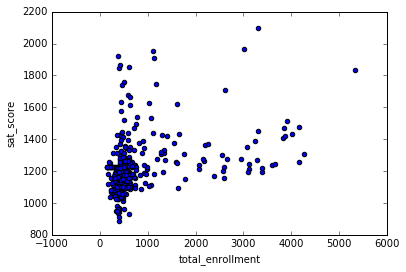

In [44]:
# Create a scatterplot of total_enrollment versus sat_score.
import matplotlib.pyplot as plt
combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between sat_score and total_enrollment. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [46]:
# Filter the combined dataframe to keep only those rows where total_enrollment is under 1000 and sat_score is under 1000. 
# Assign the result to low_enrollment.
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
# Displaying all of the items in the School Name column of low_enrollment.
print(low_enrollment["School Name"])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


The above result revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually ell_percent that correlates strongly with sat_score, rather than total_enrollment. To explore this relationship further, let's plot out ell_percent vs sat_score.

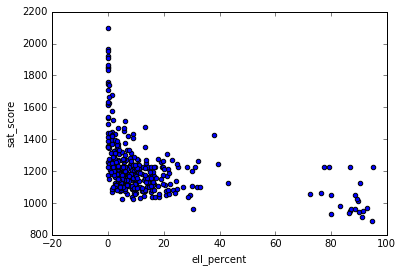

In [47]:
# Create scatterplot of ell_percent versus sat_score.
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

It looks like ell_percent correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high ell_percent values and low sat_score values. This cluster represents the same group of international high schools we investigated earlier.

### Let's Explore more:

New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair.

We'll extend this types of analysis more. The dataframe combined contains all of the data we'll be using in our analysis.

In [32]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

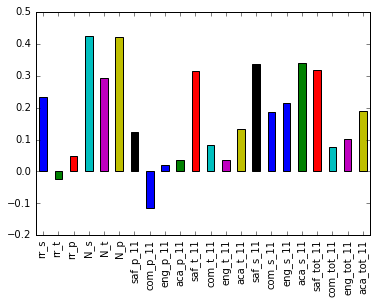

In [49]:
# this is to set up matplotlib to work in Jupyter notebook
%matplotlib inline

# Making a bar plot of the correlations between survey_fields and sat_score.
combined.corr()["sat_score"][survey_fields].plot.bar()

There are high correlations between N_s, N_t, N_p and sat_score. Since these columns are correlated with total_enrollment, it makes sense that they would be high.

It is more interesting that rr_s, the student response rate, or the percentage of students that completed the survey, correlates with sat_score. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

How students and teachers percieved safety (saf_t_11 and saf_s_11) correlate with sat_score. This make sense, as it's hard to teach or learn in an unsafe environment.

The last interesting correlation is the aca_s_11, which indicates how the student perceives academic standards, correlates with sat_score, but this is not true for aca_t_11, how teachers perceive academic standards, or aca_p_11, how parents perceive academic standards.

### Exploring safety

You may have noticed that __saf_t_11__ and __saf_s_11__, which measure how teachers and students perceive safety at school, correlated highly with sat_score. ONow, we'll dig into this relationship a bit more, and try to figure out which schools have low safety scores.

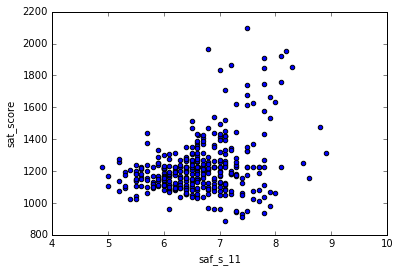

In [50]:
# Making a scatter plot of the saf_s_11 column vs. the sat_score in combined.
combined.plot.scatter("saf_s_11", "sat_score")

There appears to be a correlation between SAT scores and safety, although it isn't thatstrong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

### Plotting safety

Unfortunately, due to the number of schools, it's hard to interpret the map if made school-by-school. It looks like uptown Manhattan and parts of Queens have a higher ell_percent, but we can't be sure. One way to make very granular statistics easier to read is to aggregate them. In this case, we can aggregate by district, which will enable us to plot ell_percent district-by-district instead of school-by-school.

- Mapping out safety scores.
    - Compute the average safety score for each district.
    - Make a map that shows safety scores by district.

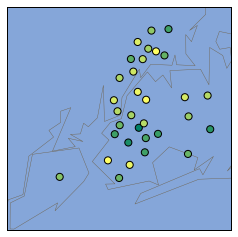

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Use the pandas.DataFrame.groupby() method to group combined by school_dist.
# Use the agg() method, along with the numpy.mean function as an argument, 
# to calculate the average of each group.
districts = combined.groupby("school_dist").agg(numpy.mean)
# Reset the index of districts, making school_dist a column,
# with the keyword argument inplace=True.
districts.reset_index(inplace=True)

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
# Temporary bug: if you run the following line of code in the Jupyter interface, you'll get an error. 
# m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()


It looks like Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.

### Racial differences in SAT scores
There are a few columns that indicate the percentage of each race at a given school:

- white_per
- asian_per
- black_per
- hispanic_per

By plotting out the correlations between these columns and sat_score, we can determine whether there are any racial differences in SAT performance.

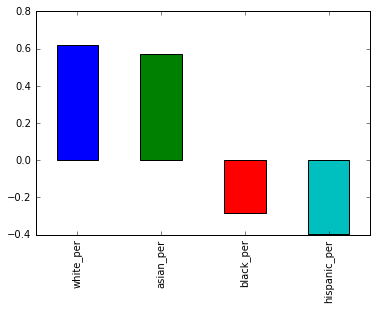

In [51]:
# Making a bar plot of the correlations between the columns above and sat_score
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar()

It looks like a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.

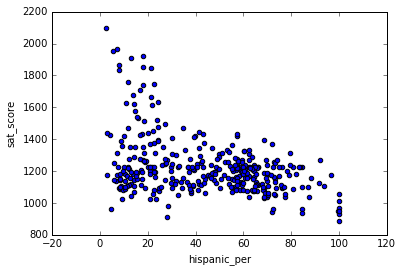

In [52]:
# Making a scatter plot of hispanic_per vs. sat_score.
combined.plot.scatter("hispanic_per", "sat_score")

In [53]:
# Exploring any schools with a hispanic_per greater than 95%.
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.

In [54]:
# Exploring any schools with a hispanic_per less than 10% and an average SAT score greater than 1800.
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

### Gender differences in SAT scores

There are two columns that indicate the percentage of each gender at a school:

- male_per
- female_per

We are ploting out the correlations between each percentage and sat_score.

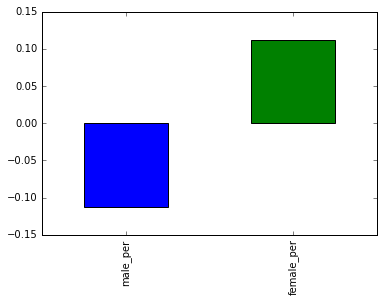

In [56]:
# Making a bar plot of the correlations between the columns above and sat_score.
gender_fields = ["male_per", "female_per"]
combined.corr()["sat_score"][gender_fields].plot.bar()

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is extremely strong.

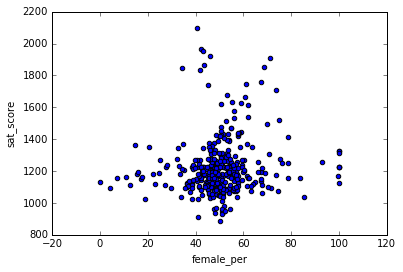

In [57]:
# Making and investigating a scatter plot of female_per vs. sat_score.
combined.plot.scatter("female_per", "sat_score")

Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.

In [58]:
# Exploring any schools with a female_per greater than 60% and an average SAT score greater than 1700.
print(combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools appears to be very selective liberal arts schools that have high academic standards.

### AP Exam Scores vs SAT Scores

In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. There are AP exams for many different subjects.

It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Let's explore this relationship. Because total_enrollment is highly correlated with sat_score, we don't want to bias our results. Instead, we'll look at the percentage of students in each school who took at least one AP exam.

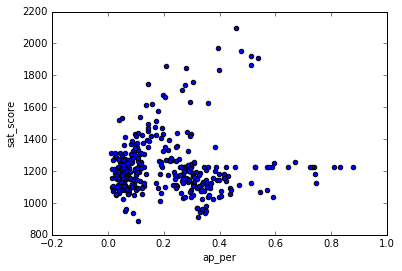

In [43]:
# Calculate the percentage of students in each school that took an AP exam.
# Divide the AP Test Takers column by the total_enrollment column.
# Note: The column name AP Test Takers has a space at the end.
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

# Making a scatter plot of ap_per vs. sat_score.
combined.plot.scatter(x='ap_per', y='sat_score')

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.